In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#spy = yf.download('SPY')['Adj Close']

In [4]:
#spy.to_csv('spy_all.csv')

In [5]:
spy = pd.read_csv('spy_all.csv', index_col=0, squeeze=True)

In [6]:
spy_ret = spy.pct_change()[1:]

<AxesSubplot:ylabel='Density'>

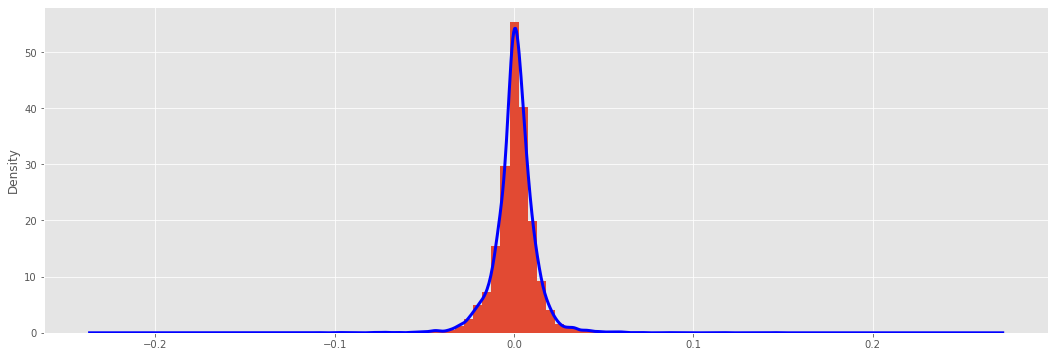

In [12]:
spy_ret.hist(figsize=(18,6), bins=50, density=True)
spy_ret.plot(kind='kde', linewidth=3, c='b')

In [13]:
spy_ret.describe()

count    7318.000000
mean        0.000456
std         0.011795
min        -0.109424
25%        -0.004285
50%         0.000682
75%         0.005893
max         0.145198
Name: Adj Close, dtype: float64

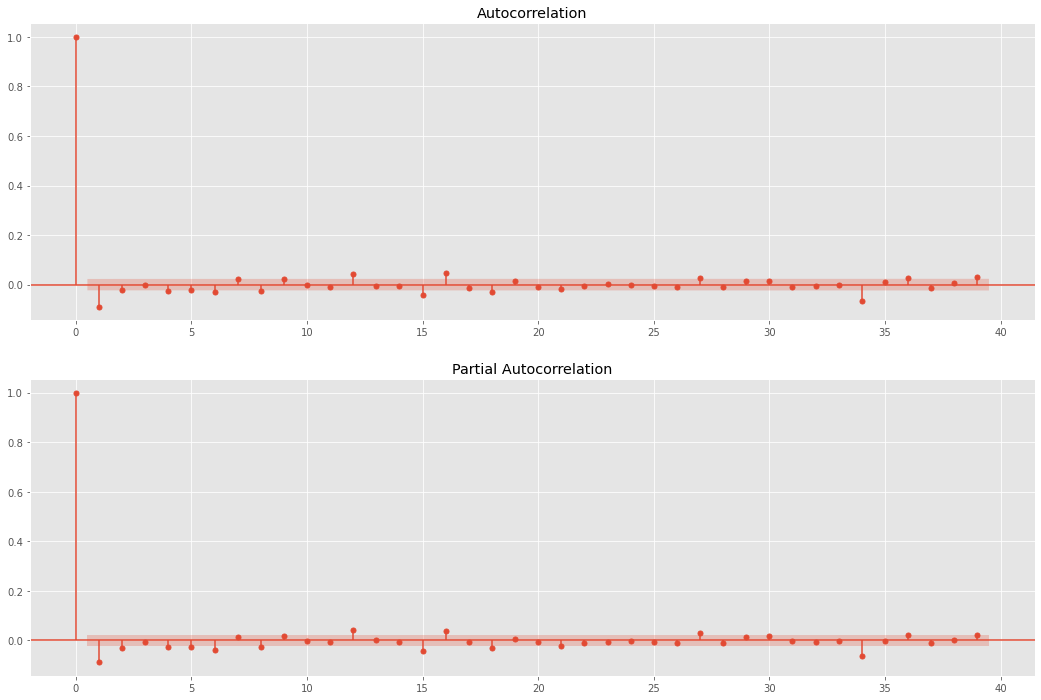

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(18,12))
plt.subplot(211)
_ = plot_acf(spy_ret, ax=plt.gca())
plt.subplot(212)
_ = plot_pacf(spy_ret, ax=plt.gca())

# Parametric distributions

In [15]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import kstest
x = np.linspace(-0.15, 0.15, 1000)

/home/alex/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


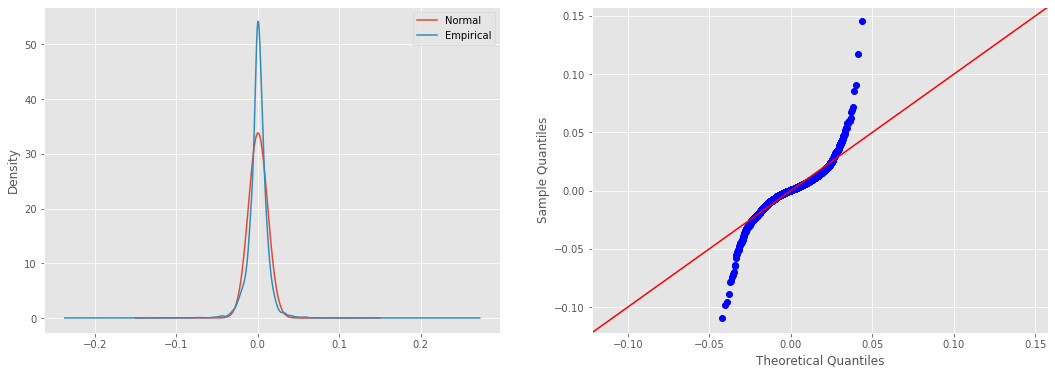

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(121)
loc,scale = stats.norm.fit(spy_ret)
plt.plot(x, stats.norm.pdf(x, loc=loc, scale=scale), label='Normal')
spy_ret.plot(kind='kde', label='Empirical')
plt.legend()
plt.subplot(122)
_ = sm.qqplot(spy_ret, stats.norm(loc=loc, scale=scale), line='45', ax=plt.gca())

In [17]:
kstest(spy_ret, stats.norm.rvs(size=len(spy_ret), loc=loc, scale=scale), N=5000)

KstestResult(statistic=0.10426345996173818, pvalue=4.910152138728566e-35)

/home/alex/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


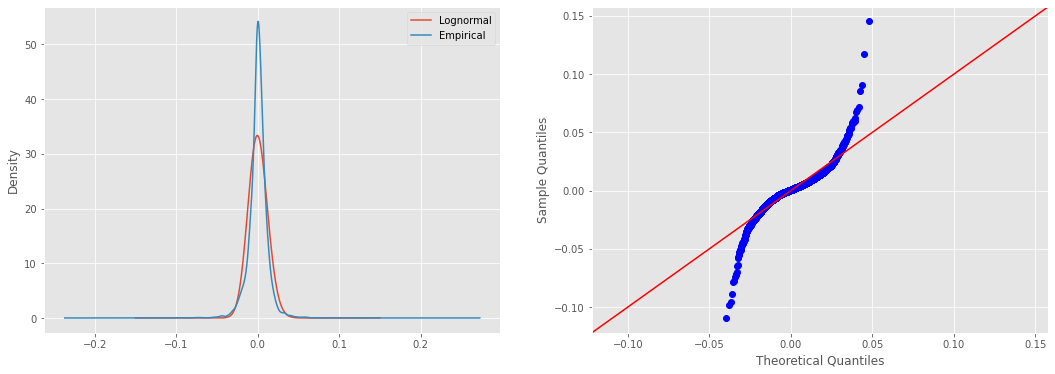

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(121)
s,loc,scale = stats.lognorm.fit(spy_ret)
plt.plot(x, stats.lognorm.pdf(x, s=s, loc=loc, scale=scale), label='Lognormal')
spy_ret.plot(kind='kde', label='Empirical', figsize=(18,6))
plt.legend()
plt.subplot(122)
_ = sm.qqplot(spy_ret, stats.lognorm(s=s, loc=loc, scale=scale), line='45', ax=plt.gca())

In [19]:
kstest(spy_ret, stats.lognorm.rvs(size=len(spy_ret), s=s, loc=loc, scale=scale), N=5000)

KstestResult(statistic=0.10481005739273025, pvalue=2.1212428161158595e-35)

/home/alex/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


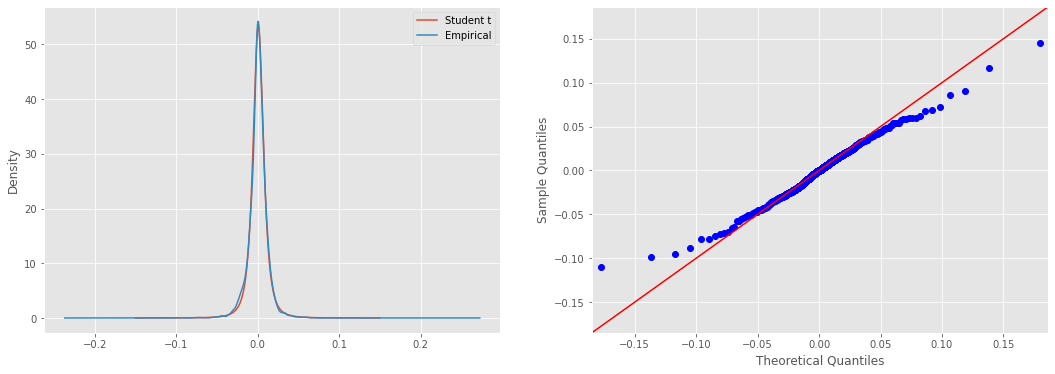

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(121)
nu,loc,scale = stats.t.fit(spy_ret)
plt.plot(x, stats.t.pdf(x, df=nu, loc=loc, scale=scale), label='Student t')
spy_ret.plot(kind='kde', label='Empirical', figsize=(18,6))
plt.legend()
plt.subplot(122)
_ = sm.qqplot(spy_ret, stats.t(df=nu, loc=loc, scale=scale), line='45', ax=plt.gca())

In [27]:
kstest(spy_ret, stats.t.rvs(size=len(spy_ret), df=nu, loc=loc, scale=scale), N=5000)

KstestResult(statistic=0.019677507515714676, pvalue=0.11758355745817041)

# Pearson III

/home/alex/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


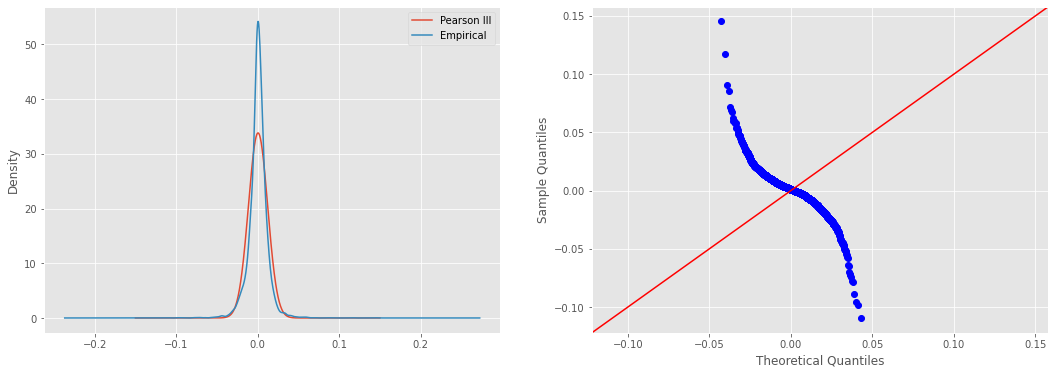

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(121)
skew,loc,scale = stats.pearson3.fit(spy_ret)
plt.plot(x, stats.pearson3.pdf(x, skew=skew, loc=loc, scale=scale), label='Pearson III')
spy_ret.plot(kind='kde', label='Empirical', figsize=(18,6))
plt.legend()
plt.subplot(122)
_ = sm.qqplot(spy_ret, stats.pearson3(skew=skew, loc=loc, scale=scale), line='45', ax=plt.gca())

In [29]:
kstest(spy_ret, stats.pearson3.rvs(size=len(spy_ret), skew=skew, loc=loc, scale=scale), N=5000)

KstestResult(statistic=0.0992074337250615, pvalue=9.370862718911523e-32)

# Metalog

In [30]:
from metalog import metalog

In [31]:
metalog_ret = metalog.fit(spy_ret.values, step_len=0.001)

In [32]:
metalog.summary(m=metalog_ret)

 -----------------------------------------------
 SUMMARY OF METALOG DISTRIBUTION OBJECT
 -----------------------------------------------

PARAMETERS
 
 Term Limit:  13 
 Term Lower Bound:  2 
 Boundedness:  u 
 Bounds (only used based on boundedness):  [0, 1] 
 Step Length for Distribution Summary:  0.001 
 Method Use for Fitting:  any 
 Number of Data Points Used:  7318 
 Original Data Saved:  False 
 

VALIDATION AND FIT METHOD
 
     term valid method
2      2   yes    OLS
3      3   yes    OLS
4      4   yes    OLS
5      5   yes    OLS
6      6   yes    OLS
7      7   yes    OLS
8      8   yes    OLS
9      9   yes    OLS
10    10   yes    OLS
11    11   yes    OLS
12    12   yes    OLS
13    13   yes    OLS


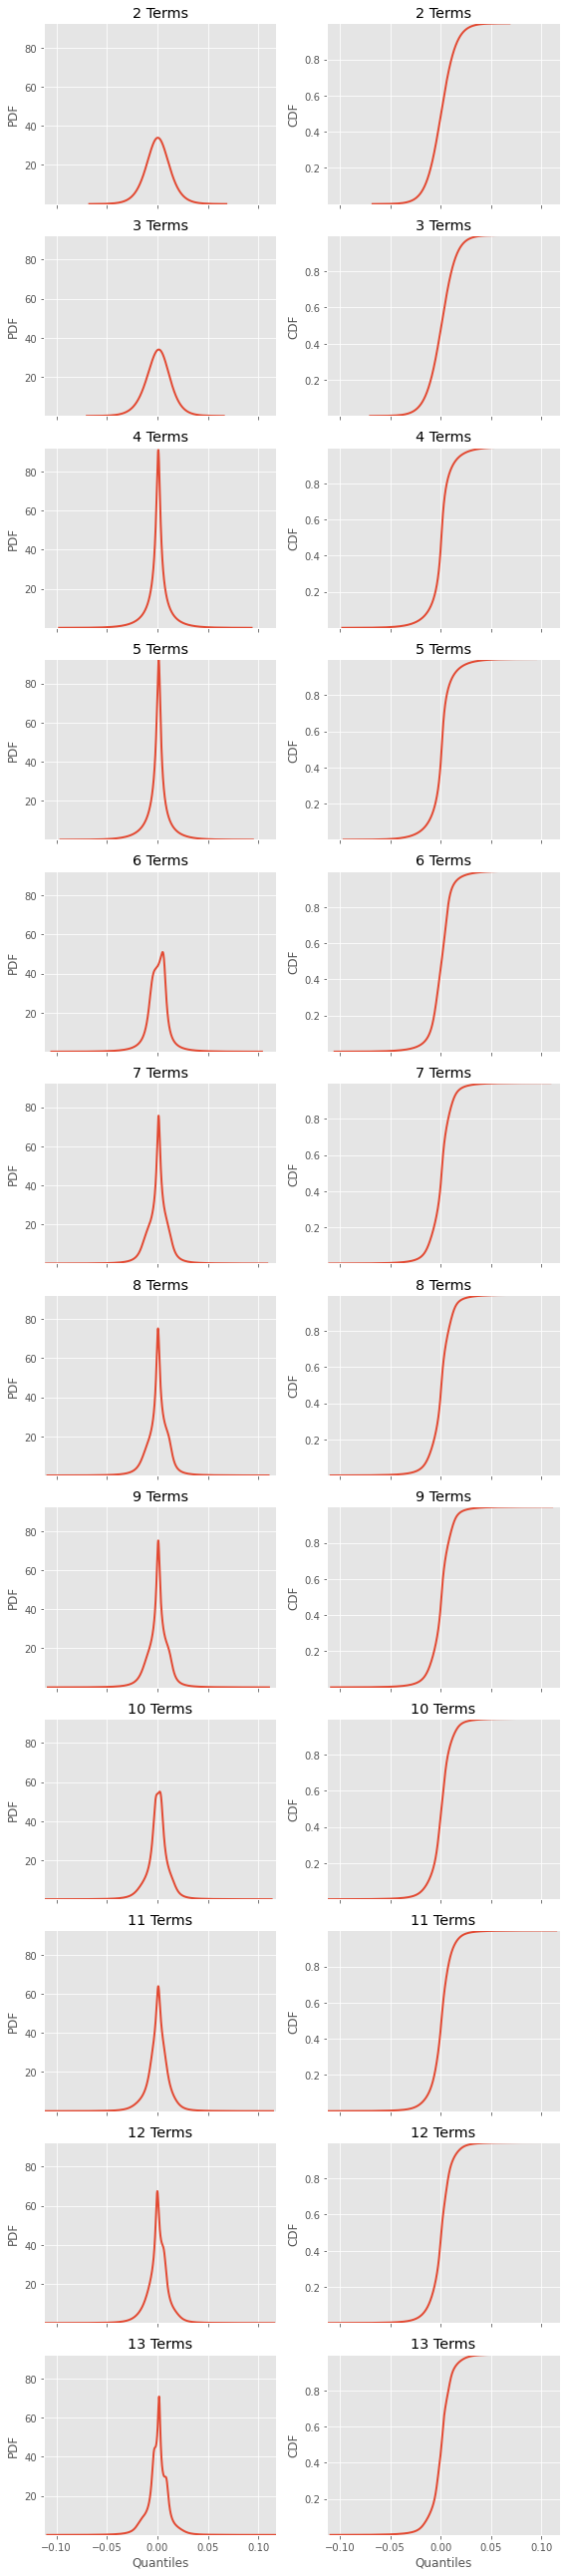

In [33]:
metalog.plot(m=metalog_ret)

In [37]:
best_t, best_stat = None, float('Inf')
for t in range(2,14):
    stat,pval = kstest(spy_ret, metalog.r(m=metalog_ret, n=len(spy_ret), term=t), N=5000)
    if stat<best_stat:
        best_stat = stat
        best_t = t
    print(f'Num_terms={t}: stat={stat}, p-value={pval}')
    
print(f'Best number of terms: {best_t}')

Num_terms=2: stat=0.09196501776441651, p-value=2.4283076550614057e-27
Num_terms=3: stat=0.09524460235036895, p-value=2.6816911152498674e-29
Num_terms=4: stat=0.05247335337523914, p-value=3.5210765419146153e-09
Num_terms=5: stat=0.051516807871003004, p-value=7.295846003086465e-09
Num_terms=6: stat=0.03771522273845313, p-value=6.0189550790013515e-05
Num_terms=7: stat=0.02596337797212353, p-value=0.01440597492859207
Num_terms=8: stat=0.020087455588958733, p-value=0.10436640438886506
Num_terms=9: stat=0.02295709210166712, p-value=0.0422678315097752
Num_terms=10: stat=0.021453949166438918, p-value=0.06889361005707705
Num_terms=11: stat=0.009975403115605356, p-value=0.8597713995852801
Num_terms=12: stat=0.012708390270565728, p-value=0.5957874956824607
Num_terms=13: stat=0.015031429352282044, p-value=0.38011237660224606
Best number of terms: 11


/home/alex/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


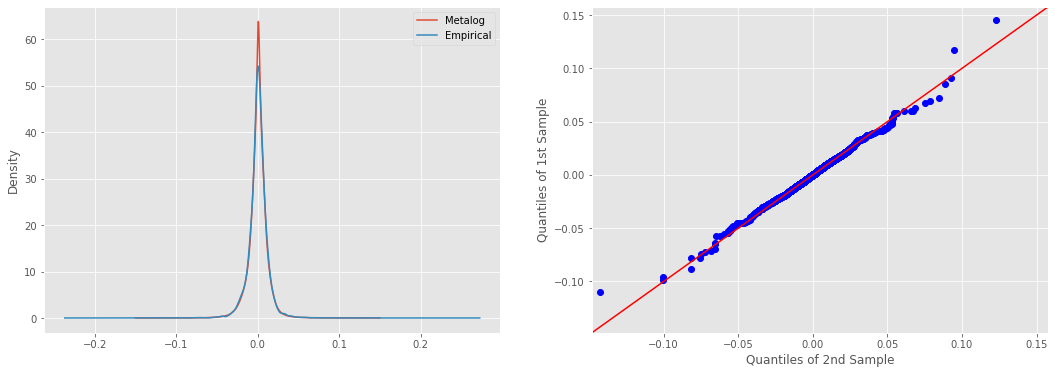

In [38]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(x, metalog.d(m=metalog_ret, q=x, term=11), label='Metalog')
spy_ret.plot(kind='kde', label='Empirical', figsize=(18,6))
plt.legend()
plt.subplot(122)
_ = sm.qqplot_2samples(spy_ret, metalog.r(m=metalog_ret, n=len(spy_ret), term=11), line='45', ax=plt.gca())